<a href="https://colab.research.google.com/github/ShaxobiddinMukhiddinov/Web_Scraping/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Installtion***

In [ ]:
import requests
from bs4 import BeautifulSoup
from operator import itemgetter
from pandas._libs import index
from pandas.core.frame import DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Get data with request

In [ ]:
result = requests.get('https://kun.uz/uz/')
News = BeautifulSoup(result.text,'html.parser').find_all('a',class_="news-lenta")


Yangiliklar orasidan biriga kirib undagi mantni olish

In [ ]:
link ='https://kun.uz'+str(News[4]).split()[2][6:-2]
request2 = requests.get(link).text
soup = BeautifulSoup(request2,'html.parser').select_one('div.single-content')

word_list = ['bu','yoki','haqida','esa','va','bilan','deya','lekin','uchun','unga','qildi','-','u',",","."]

In [ ]:
res2 = []
res = soup.find_all("p")

for x in res:
  res2.append(x.text)

res2= str(res2).lower().split()

toza_data =[]
for i in res2:
  if  not  i.isdigit():
      if i not in word_list:
        toza_data.append(i)

DATA = {}
for k in toza_data:
  words_count = toza_data.count(k)
  DATA[k] = words_count


sort = sorted(DATA.items(), key=itemgetter(1), reverse=True)
sort = sort[0:11]


Pandas

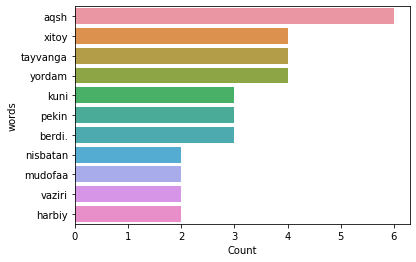

In [ ]:

data_frame = DataFrame(sort)
data_frame = data_frame.rename(columns={0: 'words', 1: 'Count'})
sns.barplot(x='Count', y='words', data=data_frame)
plt.show()

